# Feature Engineering

In [2]:
# import libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')
df_copy = df.copy()
df_copy.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [5]:
# extrating contacted_before from pdays 
def is_contacted_before(x):
    if x == 999:
        return 'no'
    else:
        return 'yes'

df_copy['contacted_before'] = df_copy['pdays'].apply(is_contacted_before)
df_copy['contacted_before'].value_counts(normalize=True)*100

contacted_before
no     96.321744
yes     3.678256
Name: proportion, dtype: float64

In [365]:
# drop pdays
df_copy.drop('pdays', axis=1, inplace=True)
df_copy.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [366]:
# convert poutcome to binary
df_copy['poutcome'] = df_copy['poutcome'].map({'failure':0, 'nonexistent':0, 'success':1})

In [367]:
df_copy.sample(5).T

,14078,5568,31587,29670,5024
age,29,45,57,46,47
job,services,housemaid,retired,services,blue-collar
marital,married,married,divorced,married,married
education,high.school,professional.course,high.school,high.school,unknown
default,no,unknown,no,no,unknown
housing,yes,no,yes,no,yes
loan,yes,no,yes,no,no
contact,cellular,telephone,cellular,cellular,telephone
month,jul,may,may,apr,may
day_of_week,mon,mon,thu,mon,wed


In [368]:
# Feature selection
# drop duration
df_copy.drop('duration', axis=1, inplace=True)
df_copy.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


# Feature Transformations

## data cleaning

In [369]:
df_copy.replace('unknown', np.nan, inplace=True)

In [370]:
df_copy.sample(5).T

,2063,11471,854,18607,31684
age,33,49,45,47,34
job,blue-collar,blue-collar,housemaid,technician,blue-collar
marital,married,married,married,married,married
education,professional.course,basic.4y,basic.4y,professional.course,basic.4y
default,no,NaN,NaN,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,no
contact,telephone,telephone,telephone,cellular,cellular
month,may,jun,may,jul,may
day_of_week,mon,fri,wed,thu,thu


## Handle missing values

In [371]:
# check for missing values
df_copy.isnull().sum()

age                    0
job                  330
marital               80
education           1731
default             8597
housing              990
loan                 990
contact                0
month                  0
day_of_week            0
campaign               0
previous               0
poutcome               0
emp.var.rate           0
cons.price.idx         0
cons.conf.idx          0
euribor3m              0
nr.employed            0
y                      0
contacted_before       0
dtype: int64

In [372]:
# check for missing values percentage
df_copy.isnull().sum() / len(df_copy) * 100

age                  0.000000
job                  0.801204
marital              0.194231
education            4.202680
default             20.872584
housing              2.403613
loan                 2.403613
contact              0.000000
month                0.000000
day_of_week          0.000000
campaign             0.000000
previous             0.000000
poutcome             0.000000
emp.var.rate         0.000000
cons.price.idx       0.000000
cons.conf.idx        0.000000
euribor3m            0.000000
nr.employed          0.000000
y                    0.000000
contacted_before     0.000000
dtype: float64

In [373]:
# drop missing values with 5% threshold
df_copy.dropna(subset=['job', 'marital', 'education', 'housing', 'loan'], axis=0, inplace=True)

In [374]:
df_copy.isnull().sum() / len(df_copy) * 100

age                  0.00000
job                  0.00000
marital              0.00000
education            0.00000
default             20.28239
housing              0.00000
loan                 0.00000
contact              0.00000
month                0.00000
day_of_week          0.00000
campaign             0.00000
previous             0.00000
poutcome             0.00000
emp.var.rate         0.00000
cons.price.idx       0.00000
cons.conf.idx        0.00000
euribor3m            0.00000
nr.employed          0.00000
y                    0.00000
contacted_before     0.00000
dtype: float64

In [375]:
# check default values
df_copy['default'].value_counts()
# this column have a 3 yes only. It is useless for model building

default
no     30485
yes        3
Name: count, dtype: int64

In [376]:
# drop default column
df_copy.drop('default', axis=1, inplace=True)
df_copy.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon
campaign,1,1,1,1,1


In [377]:
df_copy.isnull().sum() 

age                 0
job                 0
marital             0
education           0
housing             0
loan                0
contact             0
month               0
day_of_week         0
campaign            0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
contacted_before    0
dtype: int64

## Handle outliers

In [378]:
num_cols = df_copy.select_dtypes(exclude='object').columns
num_cols

Index(['age', 'campaign', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

### age

In [379]:
# treat age outliers with cap and floor teqnique
df_copy['age'][df_copy['age'] > 69] = 69
# the age should be between 17 to 69 from the boxplot (Upper and lower fence)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_39384\3475560216.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [380]:
# boxplot for age
fig=px.box(df_copy, x="age")
fig.show()

### campaign

In [381]:
# boxplot for campaign
fig=px.box(df_copy, x="campaign")
fig.show()
# we will try to use log transformation if robust scaler is not working

### cons_conf_idx

In [382]:
# cons_conf_idx values upper than 75 percentile
df_copy['cons.conf.idx'][df_copy['cons.conf.idx'] > -29.8].count()/len(df_copy)*100

1.0694208393254019

In [383]:
df_copy.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon
campaign,1,1,1,1,1


In [384]:
# data dtype
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               38245 non-null  int64  
 1   job               38245 non-null  object 
 2   marital           38245 non-null  object 
 3   education         38245 non-null  object 
 4   housing           38245 non-null  object 
 5   loan              38245 non-null  object 
 6   contact           38245 non-null  object 
 7   month             38245 non-null  object 
 8   day_of_week       38245 non-null  object 
 9   campaign          38245 non-null  int64  
 10  previous          38245 non-null  int64  
 11  poutcome          38245 non-null  int64  
 12  emp.var.rate      38245 non-null  float64
 13  cons.price.idx    38245 non-null  float64
 14  cons.conf.idx     38245 non-null  float64
 15  euribor3m         38245 non-null  float64
 16  nr.employed       38245 non-null  float64
 17

In [429]:
# save cleaned data
df_copy.to_csv('cleaned_data.csv')

In [385]:
# convert y to binary
df_copy['y'] = df_copy['y'].map({'yes':1, 'no':0})

## splitting data

In [386]:
# differentiate categorical and numerical columns
numerical_cols = ['age', 'campaign', 'previous', 'poutcome', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
nominal_cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact','contacted_before']
ordinal_cols = ['month', 'day_of_week']

In [387]:
# split data into train and test
from sklearn.model_selection import train_test_split
X = df_copy.drop('y', axis=1)
y = df_copy['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## pipeline creation

In [388]:
# make pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,RobustScaler
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans = make_column_transformer((OneHotEncoder(sparse_output = False),nominal_cols),
                                (OrdinalEncoder(),ordinal_cols),
                                (RobustScaler(),numerical_cols),
                                 remainder = 'passthrough')
set_config(display = 'diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['job', 'marital', 'education', 'housing',
                                  'loan', 'contact', 'contacted_before']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['month', 'day_of_week']),
                                ('robustscaler', RobustScaler(),
                                 ['age', 'campaign', 'previous', 'poutcome',
                                  'emp.var.rate', 'cons.price.idx',
                                  'cons.conf.idx', 'euribor3m',
                                  'nr.employed'])])

# Model Building

In [389]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
KNN = KNeighborsClassifier(5)
pipe1_KNN = make_pipeline(trans,KNN)
pipe1_KNN

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'contacted_before']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['month', 'day_of_week']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['age', 'campaign',
                                                   'previous', 'poutcome',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [390]:
# fit
pipe1_KNN.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'contacted_before']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['month', 'day_of_week']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['age', 'campaign',
                                                   'previous', 'poutcome',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [391]:
# predict
y_pred_KNN = pipe1_KNN.predict(X_test)
y_pred_KNN

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [392]:
# percesion,recall,accuracy and f1 score
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
print('precision: ',precision_score(y_pred_KNN,y_test)*100)
print('recall: ',recall_score(y_pred_KNN,y_test)*100)
print('accuracy: ',accuracy_score(y_pred_KNN,y_test)*100)
print('f1 score: ',f1_score(y_pred_KNN,y_test)*100)

precision:  26.291079812206576
recall:  50.0
accuracy:  88.86128905739312
f1 score:  34.46153846153846


In [393]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')
pipe_lr = make_pipeline(trans,lr)
pipe_lr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'contacted_before']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['month', 'day_of_week']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['age', 'campaign',
                                                   'previous', 'poutcome',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [394]:
# fit
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'contacted_before']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['month', 'day_of_week']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['age', 'campaign',
                                                   'previous', 'poutcome',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [395]:
# predict
y_pred_lr = pipe_lr.predict(X_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [396]:
# percesion,recall,accuracy and f1 score
print('precision: ',precision_score(y_pred_lr,y_test)*100)
print('recall: ',recall_score(y_pred_lr,y_test)*100)
print('accuracy: ',accuracy_score(y_pred_lr,y_test)*100)
print('f1 score: ',f1_score(y_pred_lr,y_test)*100)

precision:  21.12676056338028
recall:  66.91449814126395
accuracy:  90.05098705713165
f1 score:  32.114183764495984


In [397]:
# SVM
from sklearn.svm import SVC
svm = SVC()
pipe_svm = make_pipeline(trans,svm)
pipe_svm

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'contacted_before']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['month', 'day_of_week']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['age', 'campaign',
                                                   'previous', 'poutcome',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('svc', SVC())])

In [398]:
# fit
pipe_svm.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'contacted_before']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['month', 'day_of_week']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['age', 'campaign',
                                                   'previous', 'poutcome',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('svc', SVC())])

In [399]:
# predict
y_pred_svm = pipe_svm.predict(X_test)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [400]:
# percesion,recall,accuracy and f1 score
print('precision: ',precision_score(y_pred_svm,y_test)*100)
print('recall: ',recall_score(y_pred_svm,y_test)*100)
print('accuracy: ',accuracy_score(y_pred_svm,y_test)*100)
print('f1 score: ',f1_score(y_pred_svm,y_test)*100)

precision:  19.248826291079812
recall:  70.6896551724138
accuracy:  90.11635507909531
f1 score:  30.25830258302583


In [401]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
pipe_dt = make_pipeline(trans,dt)
pipe_dt

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'contacted_before']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['month', 'day_of_week']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['age', 'campaign',
                                                   'previous', 'poutcome',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [402]:
# fit
pipe_dt.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'contacted_before']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['month', 'day_of_week']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['age', 'campaign',
                                                   'previous', 'poutcome',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [403]:
# predict
y_pred_dt = pipe_dt.predict(X_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [404]:
# percesion,recall,accuracy and f1 score
print('precision: ',precision_score(y_pred_dt,y_test)*100)
print('recall: ',recall_score(y_pred_dt,y_test)*100)
print('accuracy: ',accuracy_score(y_pred_dt,y_test)*100)
print('f1 score: ',f1_score(y_pred_dt,y_test)*100)

precision:  33.33333333333333
recall:  30.08474576271186
accuracy:  83.94561380572624
f1 score:  31.625835189309576


In [405]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
pipe_rf = make_pipeline(trans,rf)
pipe_rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'contacted_before']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['month', 'day_of_week']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['age', 'campaign',
                                                   'previous', 'poutcome',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [406]:
# fit
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'contacted_before']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['month', 'day_of_week']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['age', 'campaign',
                                                   'previous', 'poutcome',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [407]:
# predict
y_pred_rf = pipe_rf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [408]:
# percesion,recall,accuracy and f1 score
print('precision: ',precision_score(y_pred_rf,y_test)*100)
print('recall: ',recall_score(y_pred_rf,y_test)*100)
print('accuracy: ',accuracy_score(y_pred_rf,y_test)*100)
print('f1 score: ',f1_score(y_pred_rf,y_test)*100)

precision:  28.87323943661972
recall:  53.131749460043196
accuracy:  89.24042358478232
f1 score:  37.41444866920152


In [409]:
# ensemble
from sklearn.ensemble import VotingClassifier
KNN = KNeighborsClassifier(5)
DT = DecisionTreeClassifier()
Lr = LogisticRegression(solver = 'liblinear')
model_v = VotingClassifier(estimators = [('x1',KNN),('x2',Lr),('x3',DT)],voting = 'hard',verbose = True)
pipe_v = make_pipeline(trans,model_v)

In [410]:
# fit
pipe_v.fit(X_train,y_train)

[Voting] ....................... (1 of 3) Processing x1, total=   0.0s
[Voting] ....................... (2 of 3) Processing x2, total=   0.2s
[Voting] ....................... (3 of 3) Processing x3, total=   0.2s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'contacted_before']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['month', 'day_of_week']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['age', 'campaign',
                                                   'previous', 'poutcome',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('x1', KNeighborsClassifier()),
                                              ('x2',
                                               LogisticRegression(solver='liblinear')),
                                              ('x3', DecisionTreeClassifier())],
                                  verbose=True))])

In [411]:
# predict
y_pred_v = pipe_v.predict(X_test)
y_pred_v

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [412]:
# percesion,recall,accuracy and f1 score
print('precision: ',precision_score(y_pred_v,y_test)*100)
print('recall: ',recall_score(y_pred_v,y_test)*100)
print('accuracy: ',accuracy_score(y_pred_v,y_test)*100)
print('f1 score: ',f1_score(y_pred_v,y_test)*100)

precision:  24.647887323943664
recall:  57.85123966942148
accuracy:  89.60648450777879
f1 score:  34.5679012345679


In [413]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
pipe_xgb = make_pipeline(trans,xgb)
pipe_xgb

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'contacted_before']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['month', 'day_of_week']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['age', 'campaign',
                                                   'previous', 'poutcom...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [414]:
# fit
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'contacted_before']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['month', 'day_of_week']),
                                                 ('robustscaler',
                                                  RobustScaler(),
                                                  ['age', 'campaign',
                                                   'previous', 'poutcom...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [415]:
# predict
y_pred_xgb = pipe_xgb.predict(X_test)
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [416]:
# percesion,recall,accuracy and f1 score
print('precision: ',precision_score(y_pred_xgb,y_test)*100)
print('recall: ',recall_score(y_pred_xgb,y_test)*100)
print('accuracy: ',accuracy_score(y_pred_xgb,y_test)*100)
print('f1 score: ',f1_score(y_pred_xgb,y_test)*100)

precision:  28.28638497652582
recall:  61.16751269035533
accuracy:  90.01176624395346
f1 score:  38.68378812199037


In [417]:
# cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(pipe_rf,X_train,y_train,cv=5)

array([0.89509804, 0.88936101, 0.89295637, 0.89606145, 0.89295637])

In [418]:
cross_val_score(pipe_xgb,X_train,y_train,cv=5)

array([0.89771242, 0.89687857, 0.8963883 , 0.89785913, 0.89900311])

In [419]:
# transform data
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

In [420]:
# handle imbalanced dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [421]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_over, y_train_over)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7}
Best score:  0.9214784847370356


In [422]:
# confusion matrix for xgb
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_xgb)

array([[6644,  153],
       [ 611,  241]], dtype=int64)

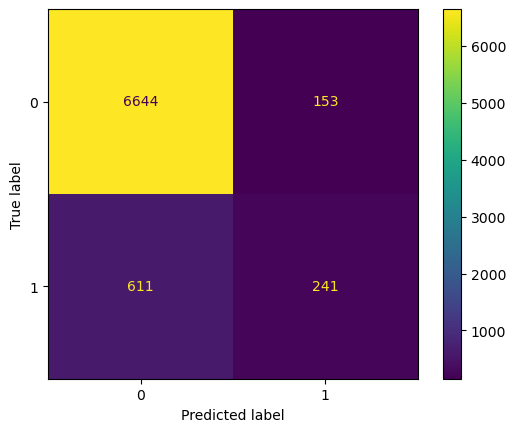

In [423]:
# Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)

In [424]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

print(roc_auc_score(y_test, y_pred_xgb))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
px.line(x=fpr, y=tpr, title="ROC Curve")

0.6301769594567059


In [428]:
# Saving the model
import pickle
pickle.dump(pipe_xgb,open('xgb.pkl','wb'))

In [436]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Title
st.title('Deposit Prediction\n')

# Image
st.image('images.jpeg', width=500)

# Load Cleaned Data
df = pd.read_csv('cleaned_data.csv')

# Load model
model = pickle.load(open('xgb.pkl', 'rb'))

# Input Data
job = st.selectbox('job', df['job'].unique())
marital = st.selectbox('marital', df['marital'].unique())
education = st.selectbox('education', df['education'].unique())
housing = st.selectbox('housing', df['housing'].unique())
loan = st.selectbox('loan', df['loan'].unique())
contact = st.selectbox('contact', df['contact'].unique())
month = st.selectbox('month', df['month'].unique())
day_of_week = st.selectbox('day_of_week', df['day_of_week'].unique())
contacted_before = st.selectbox('contacted_before', df['contacted_before'].unique())


age = st.number_input('age', df.age.min(), df.age.max())
campaign = st.number_input('campaign', df.campaign.min(), df.campaign.max())
previous = st.number_input('previous', df.previous.min(), df.previous.max())
poutcome = st.number_input('poutcome', df.poutcome.min(), df.poutcome.max())
emp_var_rate = st.number_input('emp.var.rate', df['emp.var.rate'].min(), df['emp.var.rate'].max())
cons_price_idx = st.number_input('cons.price.idx', df['cons.price.idx'].min(), df['cons.price.idx'].max())
cons_conf_idx = st.number_input('cons.conf.idx', df['cons.conf.idx'].min(), df['cons.conf.idx'].max())
euribor3m = st.number_input('euribor3m', df['euribor3m'].min(), df['euribor3m'].max())
nr_employed = st.number_input('nr.employed', df['nr.employed'].min(), df['nr.employed'].max())

# Preprocessing
new_data = {'job':job,
            'marital':marital,
            'education':education,
            'housing':housing,
            'loan':loan,
            'contact':contact,
            'month':month,
            'day_of_week':day_of_week,
            'contacted_before':contacted_before,
            'age':age,
            'campaign':campaign,
            'previous':previous,
            'poutcome':poutcome,
            'emp.var.rate':emp_var_rate,
            'cons.price.idx':cons_price_idx,
            'cons.conf.idx':cons_conf_idx,
            'euribor3m':euribor3m,
            'nr.employed':nr_employed}

new_data = pd.DataFrame(new_data, index=[0])

# Prediction
predection = model.predict(new_data) 

if predection == 0:
    predection = 'No Deposit'
else:
    predection = 'Deposit'

# Output
if st.button('Predict'):
    st.markdown('# Deposit Prediction')
    st.markdown(predection)

Overwriting app.py


In [437]:
!streamlit run app.py 

^C


In [438]:
!pip install pipreqs

In [443]:
!pipreqs .

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in .\requirements.txt
